In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

from multi_tester import *

In [2]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

def hyp(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.hypot(x, y)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.hypot(x, y)

def log(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.log(np.hypot(x, y) + 1e-10)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.log(np.hypot(x, y) + 1e-10)

In [3]:
generator = GeneticFeatureGenerator(
    [add, sub, mul, div, hyp, log],
    operation_names = ["+", "-", "*", "/", "hyp", "log"],
    popsize = 120, 
    maxiter = 200, 
    mutation_rate = 0.05,
    max_tree_depth = 10
)

feature_generator_kargs = {
    "operations": [add, sub, mul, div, hyp, log],
    "operation_names": ["+", "-", "*", "/", "hyp", "log"],
    "popsize": 120,
    "maxiter": 200,
    "mutation_rate": 0.05,
    "max_tree_depth": 10
}

In [4]:
dataset = pd.read_csv("csv/insurance.csv")
dataset.dropna(inplace=True)
# Change a column values to not be categorical
dataset['region'] = dataset['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
dataset['sex'] = dataset['sex'].map({'male':0, 'female':1})
dataset['smoker'] = dataset['smoker'].map({'yes':1, 'no':0})
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [5]:
tester = tester(X, y, feature_generator_kargs, 10, 2, 500, verbose = True, test_size = 0.3, random_state = 17)

In [6]:
tester.test_models(nodatatests = 5, notests=20)

Split:  0 Feature:  0
Iteration:  199 Best fitness:  0.7523410783342389 Generation best 0.7434789953566521
Split:  1 Feature:  1
Iteration:  199 Best fitness:  0.1607456751117462 Generation best 0.15718440529076863
Split:  0 Feature:  2
Iteration:  199 Best fitness:  0.7591759769521922 Generation best 0.7385754007569981
Split:  1 Feature:  3
Iteration:  199 Best fitness:  0.12340713075795695 Generation best 0.09710852284919846
Split:  0 Feature:  4
Iteration:  199 Best fitness:  0.7746264090985878 Generation best 0.7524917474420495
Split:  1 Feature:  5
Iteration:  199 Best fitness:  0.12891340178885324 Generation best 0.08873953876990093
Split:  0 Feature:  6
Iteration:  199 Best fitness:  0.7607511539883939 Generation best 0.7351784972354501
Split:  1 Feature:  7


C:\Users\FernandoCaro\AppData\Local\Temp\ipykernel_5476\1723502936.py:11: RuntimeWarning: divide by zero encountered in divide
  return x / (y + 1e-10)


Iteration:  199 Best fitness:  0.11133990494149015 Generation best 0.10627194404240647
Split:  0 Feature:  8
Iteration:  199 Best fitness:  0.7623126338329764 Generation best 0.7390684996552874
Split:  1 Feature:  9
Iteration:  199 Best fitness:  0.12009241038612384 Generation best 0.08856147527885194
Iteration 4 - MSE 0.14554914157951646, R2 0.8458351166884044, MAE 0.2102220142113912, NEW_MSE 0.14625757195732275, NEW_R2 0.8450847509676336, NEW_MAE 0.2043233096475477
Iteration 9 - MSE 0.14978658694563815, R2 0.8413468368997495, MAE 0.21733615883520035, NEW_MSE 0.14743834889542035, NEW_R2 0.8438340782607843, NEW_MAE 0.20702245156242052
Iteration 14 - MSE 0.14960490917786662, R2 0.8415392690334251, MAE 0.21559861678805808, NEW_MSE 0.14472783609155873, NEW_R2 0.8467050391306814, NEW_MAE 0.20249075104436362
Iteration 19 - MSE 0.1503299030875777, R2 0.8407713593069968, MAE 0.216178071643036, NEW_MSE 0.1426993539121651, NEW_R2 0.8488535967593434, NEW_MAE 0.20067778311490064
Iteration 4 - MSE

C:\Users\FernandoCaro\AppData\Local\Temp\ipykernel_5476\1723502936.py:11: RuntimeWarning: divide by zero encountered in divide
  return x / (y + 1e-10)


Iteration:  199 Best fitness:  0.6634600019176069 Generation best 0.6552005953712624
Split:  1 Feature:  1
Iteration:  199 Best fitness:  0.16738881304703157 Generation best 0.14936330887623672
Split:  0 Feature:  2
Iteration:  199 Best fitness:  0.683882514621752 Generation best 0.66074795797701611
Split:  1 Feature:  3
Iteration:  199 Best fitness:  0.12554389265054355 Generation best 0.110887897618058444
Split:  0 Feature:  4
Iteration:  199 Best fitness:  0.6701716258109879 Generation best 0.6523104879396228
Split:  1 Feature:  5
Iteration:  199 Best fitness:  0.14066559219807961 Generation best 0.12403720157243758
Split:  0 Feature:  6
Iteration:  199 Best fitness:  0.6892929053113144 Generation best 0.6694182802719348
Split:  1 Feature:  7
Iteration:  199 Best fitness:  0.12425635663834389 Generation best 0.10335444222752865
Split:  0 Feature:  8
Iteration:  199 Best fitness:  0.6685964487747862 Generation best 0.6648023266962832
Split:  1 Feature:  9
Iteration:  199 Best fitness

In [14]:
import os

# create forlder insuranse

if not os.path.exists("results/insurance"):
    os.makedirs("results/insurance")

for key in tester.individual_tests:
    tester.individual_tests[key].to_csv("results/insurance/" + key + ".csv")

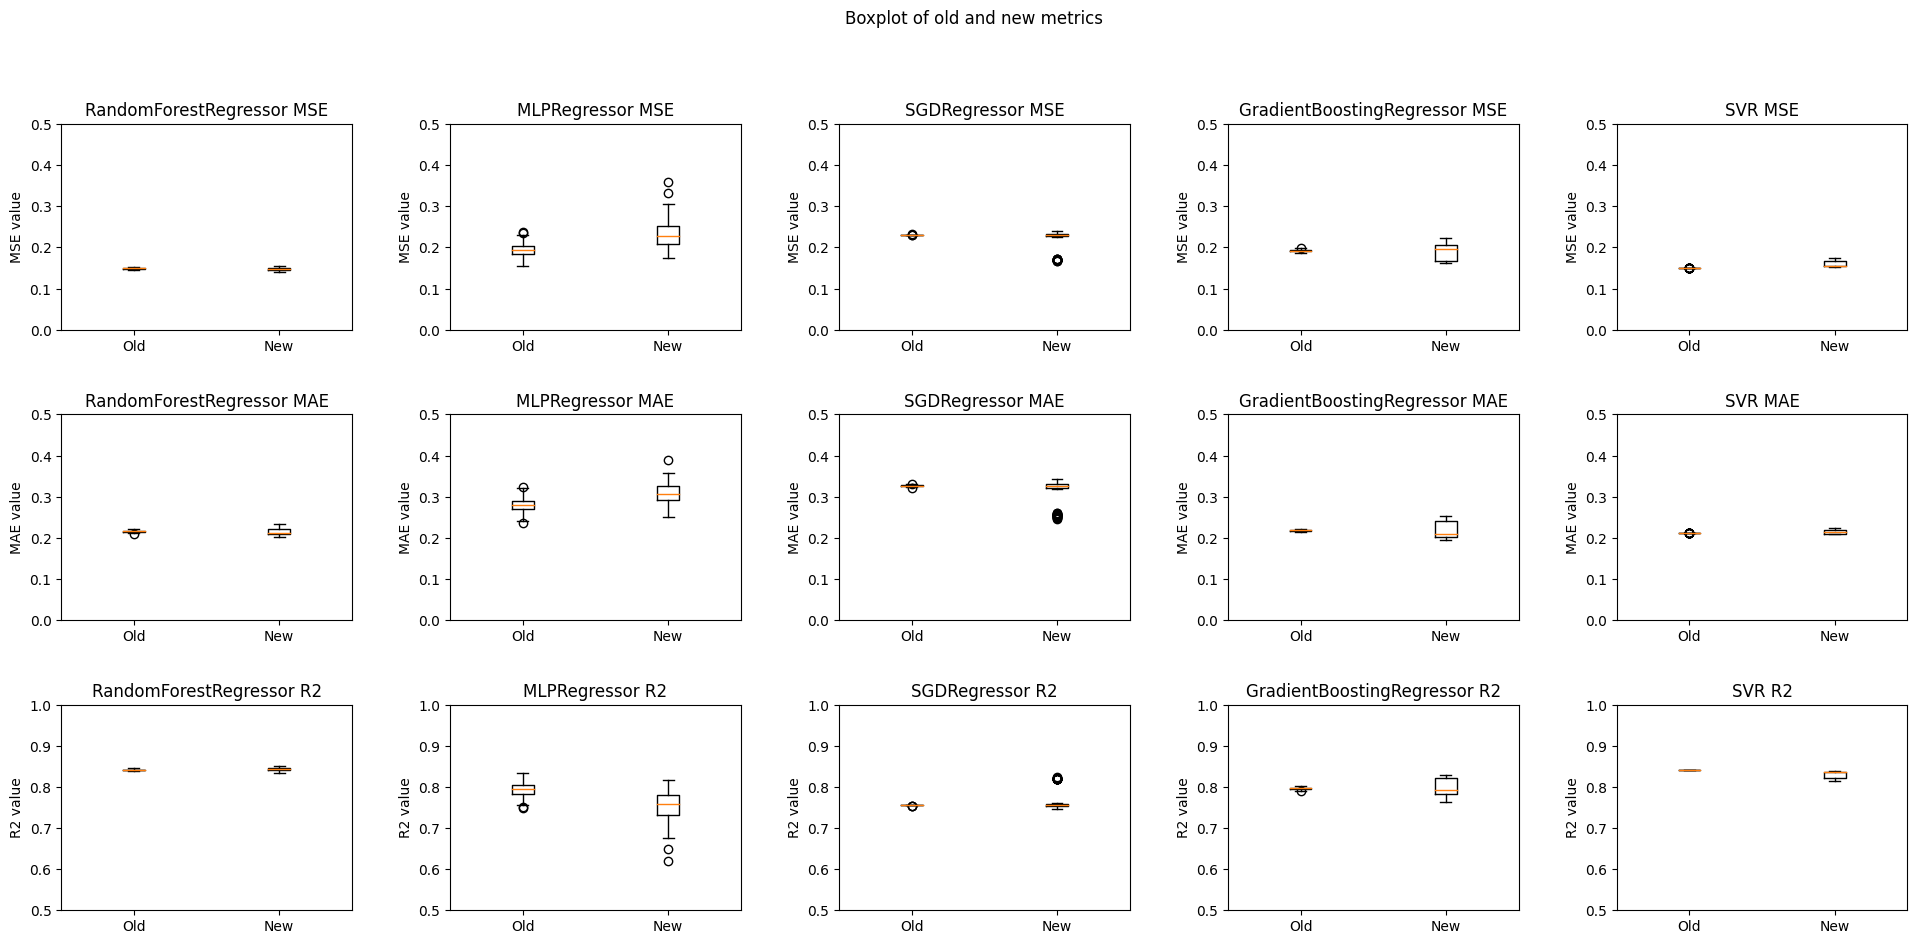

In [11]:
tests = tester.get_individual_tests()
mses = pd.DataFrame(columns = tests.keys())
maes = pd.DataFrame(columns = tests.keys())
r2s = pd.DataFrame(columns = tests.keys())
new_mses = pd.DataFrame(columns = tests.keys())
new_maes = pd.DataFrame(columns = tests.keys())
new_r2s = pd.DataFrame(columns = tests.keys())

for key in tests.keys():
    mses[key] = tests[key]["MSE"]
    maes[key] = tests[key]["MAE"]
    r2s[key] = tests[key]["R2"]
    new_mses[key] = tests[key]["NEW_MSE"]
    new_maes[key] = tests[key]["NEW_MAE"]
    new_r2s[key] = tests[key]["NEW_R2"]

NO_MODELS = len(tests.keys())
model_names = [i for i in tests.keys()]
NO_STATS = 3


fig, axs = plt.subplots(NO_STATS, NO_MODELS, figsize=(20, 10))
fig.suptitle('Boxplot of old and new metrics')

# add padding
fig.tight_layout(pad=4.0)

for i in range(NO_MODELS):
    axs[0, i].boxplot([mses.iloc[:, i], new_mses.iloc[:, i]])
    axs[0, i].set_title(model_names[i] + ' MSE')
    axs[0, i].set_xticklabels(['Old', 'New'])
    axs[0, i].set(ylabel='MSE value')
    # set mse y range between 0 and 62000
    axs[0, i].set_yscale('linear')
    axs[0, i].set_ylim(0, 0.5)

    axs[1, i].boxplot([maes.iloc[:, i], new_maes.iloc[:, i]])
    axs[1, i].set_title(model_names[i] + ' MAE')
    axs[1, i].set_xticklabels(['Old', 'New'])
    axs[1, i].set(ylabel='MAE value')

    # set mae y range between 0 and 80 in log scale
    axs[1, i].set_yscale('linear')
    axs[1, i].set_ylim(0, 0.5)


    axs[2, i].boxplot([r2s.iloc[:, i], new_r2s.iloc[:, i]])
    axs[2, i].set_title(model_names[i] + ' R2')
    axs[2, i].set_xticklabels(['Old', 'New'])
    axs[2, i].set(ylabel='R2 value')
    # set r2 y range between -0.3 and 1 and linear scale
    axs[2, i].set_yscale('linear')
    axs[2, i].set_ylim(0.5, 1)

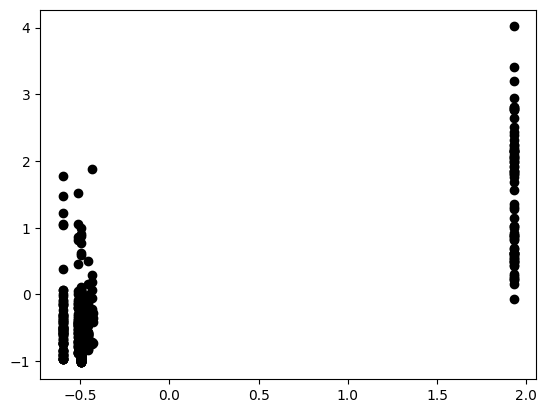

Min:  -0.5974723195919187 Max:  1.9287026665113354 Mean:  -0.05333960609841917 Std:  0.9580264271367552


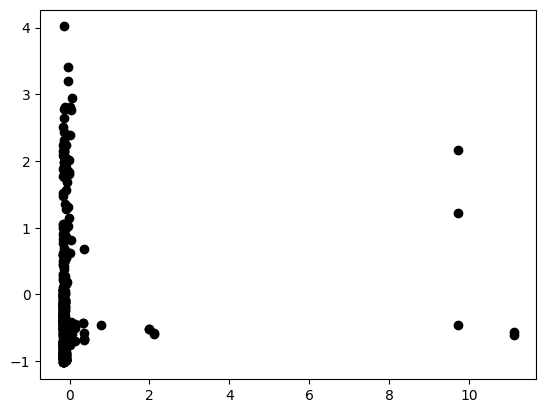

Min:  -0.16857569975477724 Max:  11.118878535274996 Mean:  0.032160188397412796 Std:  1.1767286450620662


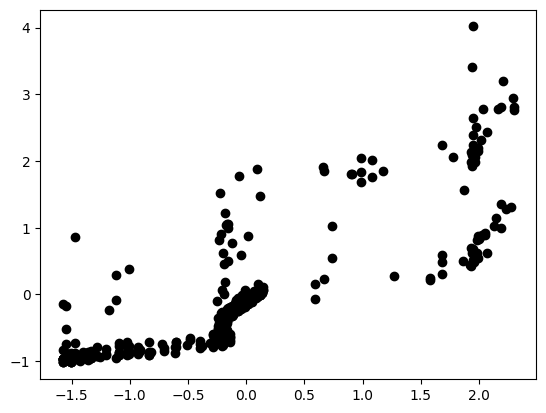

Min:  -1.5762968792160708 Max:  2.299062031495071 Mean:  -0.0997017493278487 Std:  1.0533768977841262


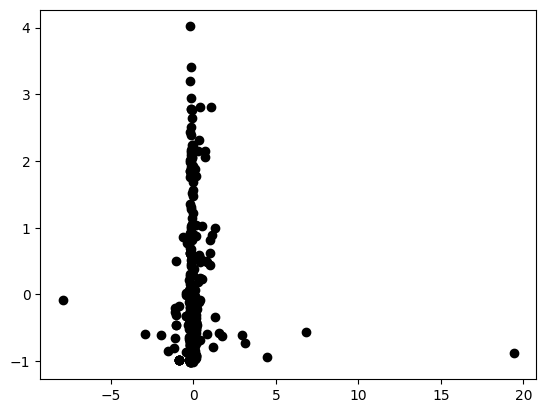

Min:  -7.914061020072721 Max:  19.40789821574801 Mean:  -0.007123865419293056 Std:  1.2041266885726127


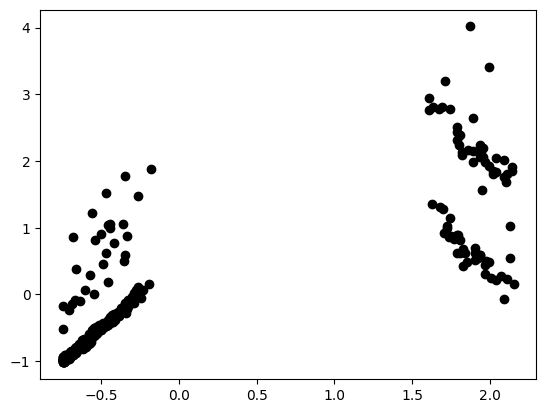

Min:  -0.7447298928395097 Max:  2.151318054386025 Mean:  -0.07164652406247488 Std:  0.9588235671580991


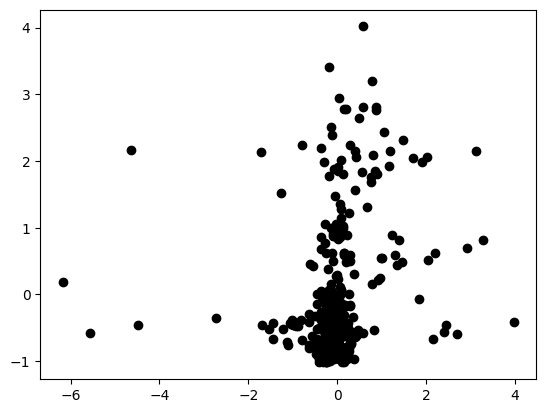

Min:  -6.174765135705645 Max:  3.9714028604612186 Mean:  -0.06329416533070818 Std:  0.8425449847735973


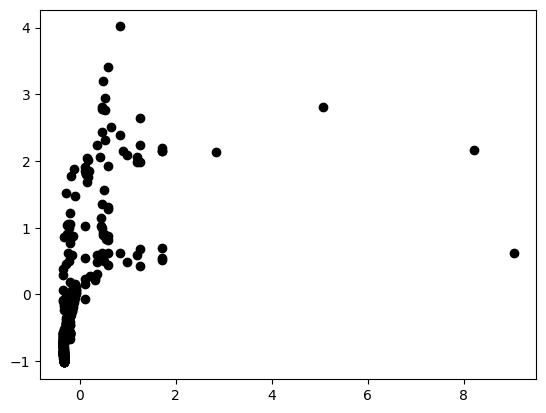

Min:  -0.3578130913405521 Max:  9.042702614317129 Mean:  -0.04913283586204113 Std:  0.7920243758639368


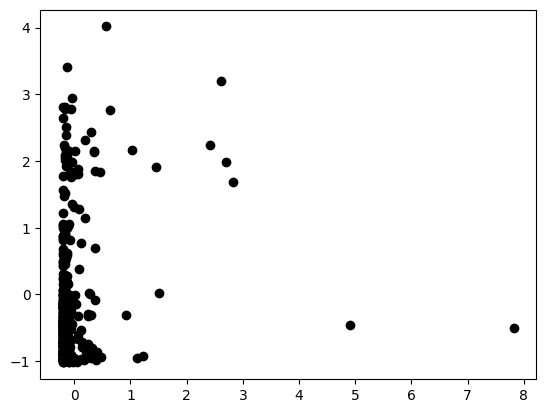

Min:  -0.20366256154809498 Max:  7.818076041797401 Mean:  -0.04671720980245659 Std:  0.5801822141091458


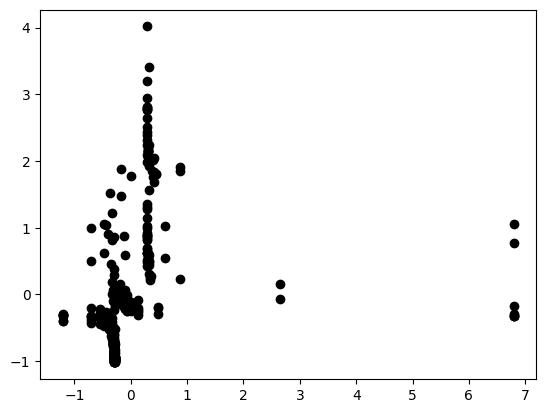

Min:  -1.205578664703263 Max:  6.79388365556584 Mean:  -0.048186221073725874 Std:  0.9836237841390301


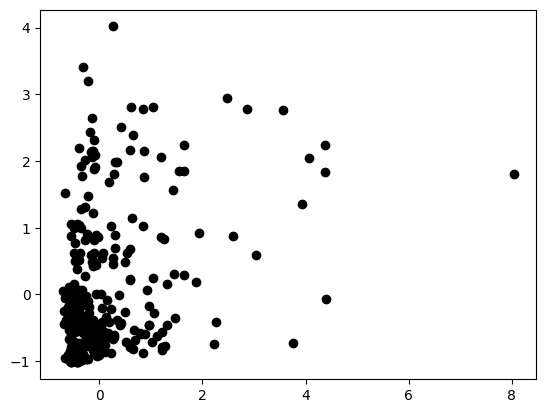

Min:  -0.7120161616049646 Max:  8.040525652542236 Mean:  -0.013121631132257602 Std:  0.9132559308388474


In [9]:
for i in range(tester.X_test.shape[1],tester.new_X_test.shape[1]):
    plt.clf()
    plt.scatter(tester.new_X_test[:,i], tester.y_test, color = 'black')
    plt.show()
    print("Min: ", tester.new_X_test[:, i].min(), "Max: ", tester.new_X_test[:, i].max(), "Mean: ", tester.new_X_test[:, i].mean(), "Std: ", tester.new_X_test[:, i].std())